In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import matplotlib.ticker as mticker
import numpy as np
import itertools

In [2]:
df_SPS1_Budg1150 = pd.read_parquet('400 iterations/results_20240811_102419_400it.gzip')
df_SPS1_Budg1150_onlyshares = pd.read_parquet('400 iterations - Only shares/results_20240812_194236.gzip')

### Grouping variables

In [3]:
groups_demand = {
    'Transport': [
        'FE_bus_diesel', 'FE_cars_diesel', 'FE_cars_gasoline', 'FE_coach_diesel',
        'FE_heavy_duty_truck_diesel', 'FE_heavy_duty_truck_gas', 'FE_light_duty_truck_diesel',
        'FE_light_duty_truck_gasoline', 'FE_motorcycle_gasoline', 'FE_other_transport_diesel', 
        'FE_other_transport_gasoline', 'FE_coach_gas', 'FE_light_duty_truck_gas', 'FE_cars_gas',
        'FE_bus_gas',
    
        'FE_cars_hydrogen', 'FE_heavy_duty_truck_hydrogen', 'FE_light_duty_truck_hydrogen',
        'FE_bus_hydrogen', 'FE_other_transport_hydrogen','FE_motorcycle_hydrogen',
    
        'FE_bus_electricity', 'FE_cars_electricity', 'FE_heavy_duty_truck_electricity',
        'FE_light_duty_truck_electricity', 'FE_other_transport_electric', 'FE_tram', 'FE_trolleybus',
        'FE_coach_electricity', 'FE_motorcycle_electric',
    ],
    'Industry': [
        'FE_industry_heat_CHP_gas', 'FE_industry_heat_CHP_oil',
        'FE_industry_heat_CHP_waste_non_renew', 'FE_industry_heat_CHP_waste_non_renew_CCS',
        'FE_industry_process_coal', 'FE_industry_process_heavy_fuel_oil',
        'FE_industry_process_light_fuel_oil', 'FE_industry_process_natural_gas', 
        'FE_industry_process_waste_non_renew', 'FE_industry_heat_DH',
         'FE_industry_heat_CHP_gas_CCS',
    

        'FE_industry_process_FE_other_electric', 'FE_industry_process_electric_boiler', 
        'FE_industry_process_heat_pump', 'FE_industry_heat_CHP_hydrogen', 'FE_industry_process_hydrogen',
        'FE_industry_process_solar', 'FE_industry_heat_CHP_fuel_cell',
        

        'FE_industry_heat_CHP_wood', 'FE_industry_heat_CHP_wood_CCS', 'FE_industry_process_pellet',
        'FE_industry_process_wood', 'FE_industry_process_waste_renew',
    ],
    'Residential heating': [
        'FE_residential_space_heating_CHP_gas', 'FE_residential_space_heating_gas',
        'FE_residential_space_heating_light_fuel_oil', 'FE_residential_water_heating_gas',
        'FE_residential_water_heating_light_fuel_oil', 'FE_residential_space_heating_heat_pump_gas',
        'FE_residential_water_heating_heat_pump_gas', 'FE_residential_space_heating_DH', 'FE_residential_water_heating_coal', 
        'FE_residential_space_heating_coal',

    
        'FE_residential_space_heating_pellet', 'FE_residential_space_heating_wood',
        'FE_residential_water_heating_pellet', 'FE_residential_water_heating_wood',
        'FE_residential_space_heating_CHP_wood',
        

    
        'FE_residential_water_heating_solar', 'FE_residential_space_heating_solar',

    
        'FE_residential_FE_other_electric', 'FE_residential_space_heating_electric_boiler',
        'FE_residential_space_heating_heat_pump',
        'FE_residential_water_heating_electric_boiler', 'FE_residential_water_heating_heat_pump',
        'FE_residential_space_heating_CHP_fuel_cell', 
        'FE_residential_water_heating_hydrogen',
    ],
    'Services': [
        'FE_services_CHP_gas', 'FE_services_light_fuel_oil', 'FE_services_natural_gas',


        'FE_services_DH',

        'FE_services_CHP_hydrogen', 'FE_services_CHP_fuel_cell',
        'FE_services_hydrogen',

    
        'FE_services_CHP_biogas', 'FE_services_pellet', 'FE_services_wood',
        'FE_services_CHP_wood',

    
        'FE_services_FE_other_electric', 'FE_services_electric_boiler',
        'FE_services_heat_pump', 'FE_services_solar'
    ],
}

In [4]:
# # Step 1: Identify all unique variables in the DataFrame
# unique_variables_in_df = set(df_SPS1_Budg1150['variable'].unique())

# # Step 2: Flatten the list of variables specified in groups_demand
# grouped_variables = set(itertools.chain.from_iterable(groups_demand.values()))

# # Step 3: Check for unaccounted variables
# unaccounted_variables = unique_variables_in_df - grouped_variables

# # Output the results
# print("Total unique variables in the DataFrame:", len(unique_variables_in_df))
# print("Total variables considered in groups:", len(grouped_variables))
# print("Variables not accounted for in any group:", unaccounted_variables)


In [5]:
custom_colors = {
    'Transport': 'firebrick',
    'Industry': 'mediumpurple',
    'Residential heating': 'orange',
    'Services': 'yellowgreen',
    'Others': 'red'
}

### Pre-work on impact categories

In [6]:
impact_categories = {
    'EF v3.1 EN15804 - climate change - global warming potential (GWP100)':'Global warming potential',
    'ReCiPe 2016 v1.03, midpoint (H) - particulate matter formation - particulate matter formation potential (PMFP)':'Particulate matter formation',
    'EF v3.1 EN15804 - acidification - accumulated exceedance (AE)': 'Acidification',
    'EF v3.1 EN15804 - ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe)':'Ecotoxicity: freshwater',
    'Inventory results and indicators - resources - total surface occupation':'Land use',
    'Inventory results and indicators - resources - total freshwater extraction': 'Water use',
    'Crustal Scarcity Indicator 2020 - material resources: metals/minerals - crustal scarcity potential (CSP)':'Crustal scarcity indicator',
    'EF v3.1 EN15804 - material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)': 'Abiotic depletion potential',
}

In [7]:
impact_units = {
    'Global warming potential': r'Mton CO$_2$ eq.',
    'Particulate matter formation': r'kton PM$_{2.5}$ eq.',
    'Crustal scarcity indicator': r'Gton Si eq.',
    'Abiotic depletion potential': r'ton Sb eq.',
    'Acidification': r'M mol H$^+$ eq.',
    'Ecotoxicity: freshwater': r'B CTUe',
    'Land use': r'km$^2$ $\cdot$ year',
    'Water use': r'hm$^3$',    
}


In [8]:
scaling_factors = {
    'Global warming potential': 1e-9,  # kg to megatonnes
    'Particulate matter formation': 1e-6, # kg to kilotonnes
    'Crustal scarcity indicator':1e-12, # kg to gigatonnes
    'Abiotic depletion potential': 1e-3,  # kg to tonnes
    'Acidification': 1e-6,  # mol to M moles
    'Ecotoxicity: freshwater': 1e-9,  # CTUe to billion CTUe
    'Land use': 1e-6,  # m²a to square kilometers
    'Water use': 1e-6,  # m³ to kliters
}

In [9]:
y_limits = {
    'Global warming potential': (0, 50),
    'Particulate matter formation': (0,40),
    'Crustal scarcity indicator':(0,10),
    'Abiotic depletion potential': (0, 800),
    'Acidification': (0, 150),
    'Ecotoxicity: freshwater': (0, 200),
    'Land use': (0, 8000),
    'Water use': (0, 120),
}

### Plot

C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_24512\2248877765.py:124: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=10, hspace=0.6)
C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_24512\2248877765.py:134: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


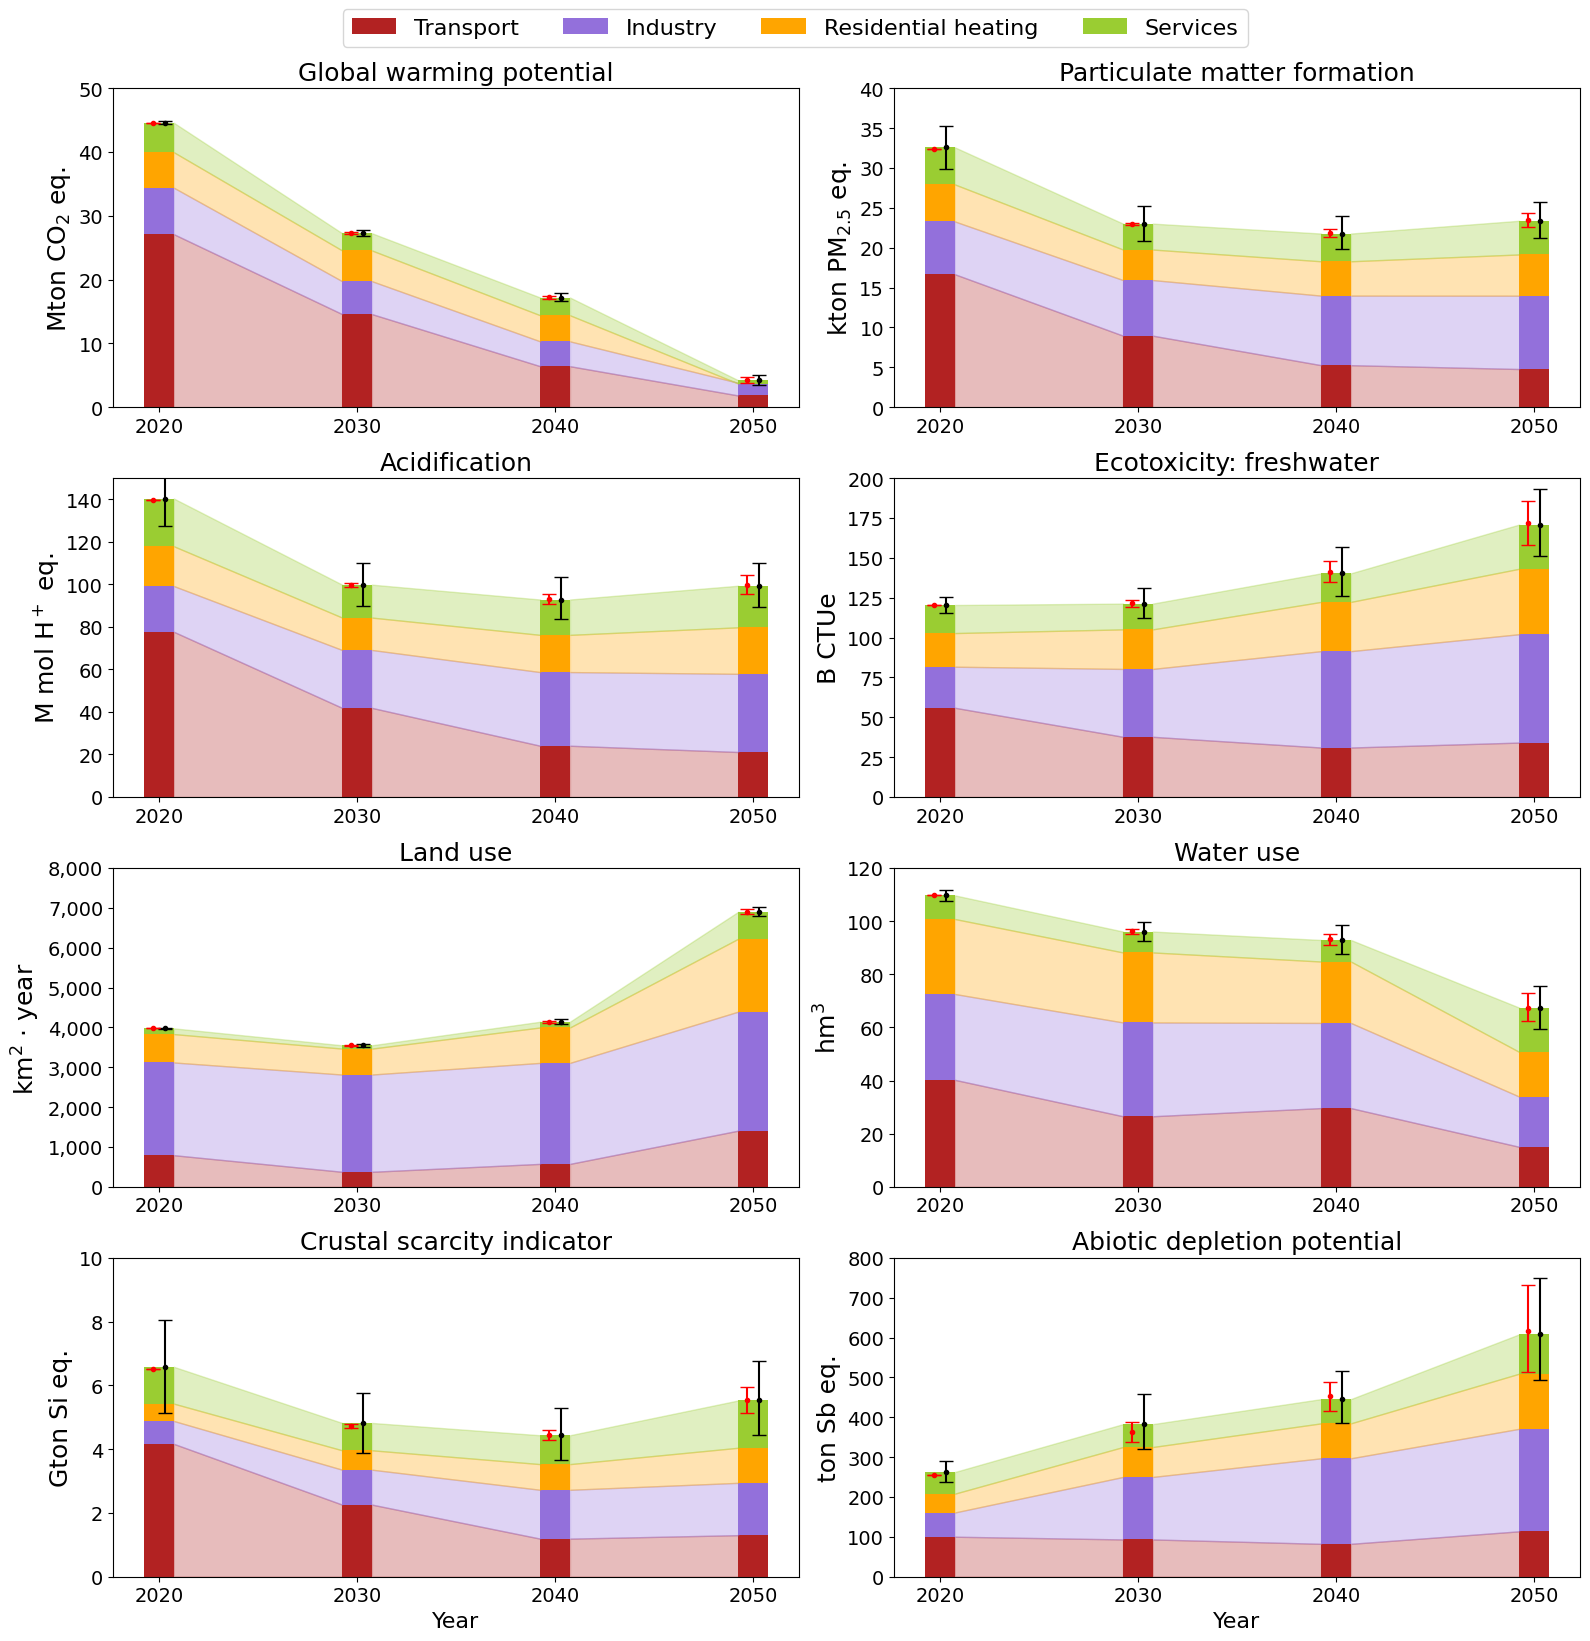

In [10]:
df_main = df_SPS1_Budg1150.copy()
df_shares = df_SPS1_Budg1150_onlyshares.copy()

# Scale the values for the main DataFrame
for cat, scale in scaling_factors.items():
    df_main.loc[df_main['impact_category'].map(impact_categories) == cat, 'value'] *= scale
    df_shares.loc[df_shares['impact_category'].map(impact_categories) == cat, 'value'] *= scale

# Filter to only include quantile = 0.5 (for the stacked bars)
df_median_main = df_main[df_main['quantile'] == 0.5]
df_median_shares = df_shares[df_shares['quantile'] == 0.5]

# Initialize subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 16), constrained_layout=True)

# Flatten the axes array
axes = axes.flatten()

# Create a dictionary to hold legend handles
legend_handles = {}

# Loop over each impact category
for i, (key, label) in enumerate(impact_categories.items()):
    
    # Filter the data for the current impact category
    df_cat_main = df_median_main[df_median_main['impact_category'] == key]
    df_cat_shares = df_median_shares[df_median_shares['impact_category'] == key]
    
    # Initialize DataFrames to store the summed values for each group
    group_sums_main = pd.DataFrame(index=[2020, 2030, 2040, 2050])
    group_sums_shares = pd.DataFrame(index=[2020, 2030, 2040, 2050])

    # Group the variables and sum their contributions for both DataFrames
    for group_name, group_vars in groups_demand.items():
        valid_vars_main = [var for var in group_vars if var in df_cat_main['variable'].unique()]
        valid_vars_shares = [var for var in group_vars if var in df_cat_shares['variable'].unique()]

        df_group_main = df_cat_main[df_cat_main['variable'].isin(valid_vars_main)].groupby('year')['value'].sum()
        df_group_shares = df_cat_shares[df_cat_shares['variable'].isin(valid_vars_shares)].groupby('year')['value'].sum()

        group_sums_main[group_name] = df_group_main
        group_sums_shares[group_name] = df_group_shares
    
    # Fill NaNs with zeros (in case some years have no data for a group)
    group_sums_main = group_sums_main.fillna(0)
    group_sums_shares = group_sums_shares.fillna(0)

    # Plot the stacked bar with wider bars
    ax = axes[i]
    bottoms = np.zeros(len(group_sums_main))
    bar_width = 1.5  # Increase bar width
    x_positions = group_sums_main.index  # Get the x positions for the bars

    for j, group_name in enumerate(groups_demand.keys()):
        values = group_sums_main[group_name].values
        color = custom_colors.get(group_name, 'gray')  # Use custom colors
        bars = ax.bar(x_positions, values, bottom=bottoms, color=color, width=bar_width, label=group_name)

        # Collect legend handles
        if group_name not in legend_handles:
            legend_handles[group_name] = bars[0]

        # Apply shading between bars
        for k in range(len(x_positions) - 1):
            # Right side of the current bar to the left side of the next bar
            ax.fill_between([x_positions[k] + bar_width/2, x_positions[k+1] - bar_width/2],
                            [bottoms[k], bottoms[k+1]],
                            [bottoms[k] + values[k], bottoms[k+1] + values[k+1]],
                            color=color, alpha=0.3)

        bottoms += values

    # Error bars using quantiles 0.05 and 0.95 from df_main
    df_cat_5_main = df_main[(df_main['quantile'] == 0.05) & (df_main['impact_category'] == key)]
    df_cat_95_main = df_main[(df_main['quantile'] == 0.95) & (df_main['impact_category'] == key)]

    # Error bars using quantiles 0.05 and 0.95 from df_shares
    df_cat_5_shares = df_shares[(df_shares['quantile'] == 0.05) & (df_shares['impact_category'] == key)]
    df_cat_95_shares = df_shares[(df_shares['quantile'] == 0.95) & (df_shares['impact_category'] == key)]

    for year in group_sums_main.index:
        # Calculate the total median for df_main
        total_median_main = group_sums_main.loc[year].sum()

        # Error bars for df_main
        error_5_main = df_cat_5_main[df_cat_5_main['year'] == year]['value'].sum()
        error_95_main = df_cat_95_main[df_cat_95_main['year'] == year]['value'].sum()

        y_err_low_main = max(0, total_median_main - error_5_main)
        y_err_high_main = max(0, error_95_main - total_median_main)

        # Plotting the first set of error bars (from df_main) at the exact year position
        ax.errorbar(year + 0.3, total_median_main, yerr=[[y_err_low_main], [y_err_high_main]], capsize=5, color='black', fmt = '.')

        # Calculate the total median for df_shares
        total_median_shares = group_sums_shares.loc[year].sum()

        # Error bars for df_shares
        error_5_shares = df_cat_5_shares[df_cat_5_shares['year'] == year]['value'].sum()
        error_95_shares = df_cat_95_shares[df_cat_95_shares['year'] == year]['value'].sum()

        y_err_low_shares = max(0, total_median_shares - error_5_shares)
        y_err_high_shares = max(0, error_95_shares - total_median_shares)

        # Plotting the second set of error bars (from df_shares) slightly offset to the right, based on df_shares median
        ax.errorbar(year - 0.3, total_median_shares, yerr=[[y_err_low_shares], [y_err_high_shares]], capsize=5, color='red', fmt = '.')

    # Customization for each subplot
    ax.set_title(label, fontsize=18)  # Change title font size
    ax.set_ylabel(impact_units[label], fontsize=18)  # Change y-axis label font size
    ax.tick_params(axis='both', which='major', labelsize=14)  # Change axis ticks font size

    # Set x-ticks for all plots
    ax.set_xticks([2020, 2030, 2040, 2050])

    # Set x-label only on the bottom row plots
    if i >= len(axes) - 2:  # Bottom row of plots
        ax.set_xlabel("Year", fontsize=16)  # Change x-axis label font size

    ax.set_ylim(y_limits[label])
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Adjust spacing between plots
plt.subplots_adjust(wspace=10, hspace=0.6)

# Extract handles and labels for the legend
handles = list(legend_handles.values())
labels = list(legend_handles.keys())

# Create a single legend centered at the top of all subplots
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=4, fontsize=16)

# Adjust the layout and show the plot
plt.tight_layout()

# Save the figure with the legend fully included
plt.savefig('Figure_1_contributions_double_bar.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Figure 2

In [11]:
relics_categories = [
    'RELICS - metals extraction - Lithium',
    'RELICS - metals extraction - Cobalt',
    'RELICS - metals extraction - Vanadium',
    'RELICS - metals extraction - Platinum',
    'RELICS - metals extraction - Palladium',
    'RELICS - metals extraction - Iridium',
    'RELICS - metals extraction - Neodymium',
    'RELICS - metals extraction - Gallium',
    'RELICS - metals extraction - Sulfur'
]

impact_categories = {col: col.split(' - ')[-1] for col in relics_categories}
impact_categories

{'RELICS - metals extraction - Lithium': 'Lithium',
 'RELICS - metals extraction - Cobalt': 'Cobalt',
 'RELICS - metals extraction - Vanadium': 'Vanadium',
 'RELICS - metals extraction - Platinum': 'Platinum',
 'RELICS - metals extraction - Palladium': 'Palladium',
 'RELICS - metals extraction - Iridium': 'Iridium',
 'RELICS - metals extraction - Neodymium': 'Neodymium',
 'RELICS - metals extraction - Gallium': 'Gallium',
 'RELICS - metals extraction - Sulfur': 'Sulfur'}

In [12]:
y_limits = {
    'Lithium': (0, 4e6),
    'Cobalt': (0, 2.5e6),
    'Vanadium': (0, 60000),
    'Platinum': (0, 6000),
    'Palladium': (0, 18000),
    'Iridium': (0, 120),
    'Neodymium': (0, 30000),
    'Gallium': (0, 10e5),
    'Sulfur': (0, 1e8)
}

C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_24512\272288734.py:120: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.4, hspace=0.4)
C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_24512\272288734.py:130: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


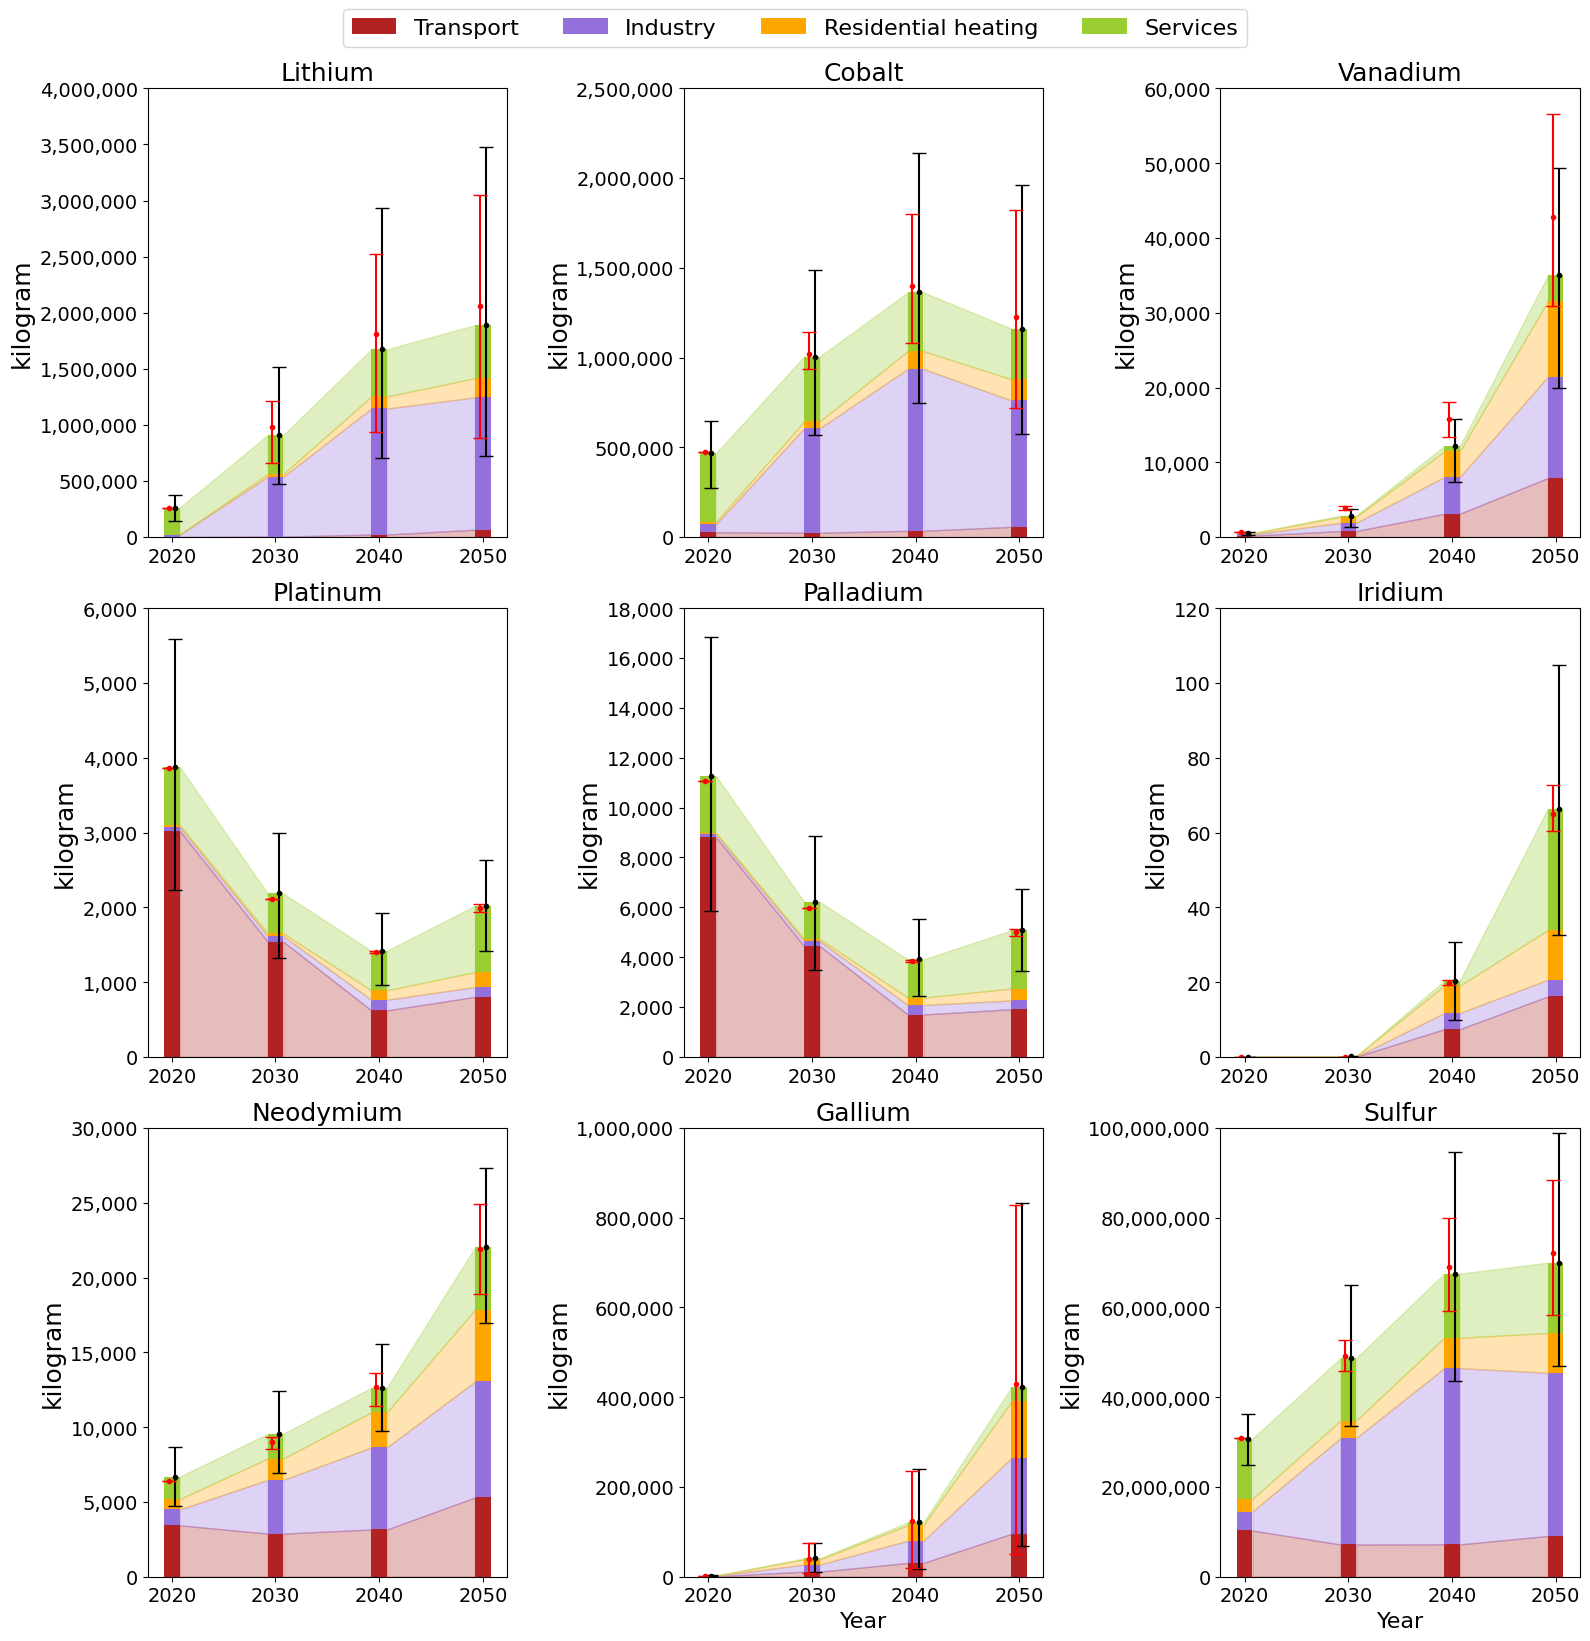

In [13]:
df = df_SPS1_Budg1150.copy()
df_shares = df_SPS1_Budg1150_onlyshares.copy()

# Filter the DataFrame to include only the selected relics categories and quantile = 0.5
df_median = df[(df['impact_category'].isin(relics_categories)) & (df['quantile'] == 0.5)]
df_median_shares = df_shares[(df_shares['impact_category'].isin(relics_categories)) & (df_shares['quantile'] == 0.5)]

# Initialize subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 16), constrained_layout=True)

# Flatten the axes array
axes = axes.flatten()

# Create a dictionary to hold legend handles
legend_handles = {}

# Loop over each impact category
for i, (key, label) in enumerate(impact_categories.items()):
    
    # Filter the data for the current impact category
    df_cat = df_median[df_median['impact_category'] == key]
    df_cat_shares = df_median_shares[df_median_shares['impact_category'] == key]
    
    # Initialize DataFrames to store the summed values for each group
    group_sums = pd.DataFrame(index=[2020, 2030, 2040, 2050])
    group_sums_shares = pd.DataFrame(index=[2020, 2030, 2040, 2050])

    # Group the variables and sum their contributions for both DataFrames
    for group_name, group_vars in groups_demand.items():
        valid_vars = [var for var in group_vars if var in df_cat['variable'].unique()]
        valid_vars_shares = [var for var in group_vars if var in df_cat_shares['variable'].unique()]

        df_group = df_cat[df_cat['variable'].isin(valid_vars)].groupby('year')['value'].sum()
        df_group_shares = df_cat_shares[df_cat_shares['variable'].isin(valid_vars_shares)].groupby('year')['value'].sum()

        group_sums[group_name] = df_group
        group_sums_shares[group_name] = df_group_shares
    
    # Fill NaNs with zeros (in case some years have no data for a group)
    group_sums = group_sums.fillna(0)
    group_sums_shares = group_sums_shares.fillna(0)

    # Plot the stacked bar with wider bars
    ax = axes[i]
    bottoms = np.zeros(len(group_sums))
    bar_width = 1.5  # Increase bar width
    x_positions = group_sums.index  # Get the x positions for the bars

    for j, group_name in enumerate(groups_demand.keys()):
        values = group_sums[group_name].values
        color = custom_colors.get(group_name, 'gray')  # Use custom colors
        bars = ax.bar(x_positions, values, bottom=bottoms, color=color, width=bar_width, label=group_name)

        # Collect legend handles
        if group_name not in legend_handles:
            legend_handles[group_name] = bars[0]

        # Apply shading between bars
        for k in range(len(x_positions) - 1):
            # Right side of the current bar to the left side of the next bar
            ax.fill_between([x_positions[k] + bar_width/2, x_positions[k+1] - bar_width/2],
                            [bottoms[k], bottoms[k+1]],
                            [bottoms[k] + values[k], bottoms[k+1] + values[k+1]],
                            color=color, alpha=0.3)

        bottoms += values

    # Error bars using quantiles 0.05 and 0.95 from df
    df_cat_5 = df[(df['quantile'] == 0.05) & (df['impact_category'] == key)]
    df_cat_95 = df[(df['quantile'] == 0.95) & (df['impact_category'] == key)]

    # Error bars using quantiles 0.05 and 0.95 from df_shares
    df_cat_5_shares = df_shares[(df_shares['quantile'] == 0.05) & (df_shares['impact_category'] == key)]
    df_cat_95_shares = df_shares[(df_shares['quantile'] == 0.95) & (df_shares['impact_category'] == key)]

    for j, year in enumerate(group_sums.index):
        # Calculate the total median for df_main
        total_median_main = group_sums.loc[year].sum()

        # Error bars for df_main
        error_5_main = df_cat_5[df_cat_5['year'] == year]['value'].sum()
        error_95_main = df_cat_95[df_cat_95['year'] == year]['value'].sum()

        y_err_low_main = max(0, total_median_main - error_5_main)
        y_err_high_main = max(0, error_95_main - total_median_main)

        # Plotting the first set of error bars (from df_main) at the exact year position
        ax.errorbar(year + 0.3, total_median_main, yerr=[[y_err_low_main], [y_err_high_main]], capsize=5, color='black', fmt = '.')

        # Calculate the total median for df_shares
        total_median_shares = group_sums_shares.loc[year].sum()

        # Error bars for df_shares
        error_5_shares = df_cat_5_shares[df_cat_5_shares['year'] == year]['value'].sum()
        error_95_shares = df_cat_95_shares[df_cat_95_shares['year'] == year]['value'].sum()

        y_err_low_shares = max(0, total_median_shares - error_5_shares)
        y_err_high_shares = max(0, error_95_shares - total_median_shares)

        # Plotting the second set of error bars (from df_shares) slightly offset to the right, based on df_shares median
        ax.errorbar(year - 0.3, total_median_shares, yerr=[[y_err_low_shares], [y_err_high_shares]], capsize=5, color='red', fmt = '.')

    # Customization for each subplot
    ax.set_title(label, fontsize=18)  # Change title font size
    ax.set_ylabel("kilogram", fontsize=18)  # Set y-axis label to "kilogram" for all plots
    ax.tick_params(axis='both', which='major', labelsize=14)  # Change axis ticks font size

    # Set x-ticks for all plots
    ax.set_xticks([2020, 2030, 2040, 2050])

    # Set x-label only on the bottom row plots
    if i >= len(axes) - 2:  # Bottom row of plots
        ax.set_xlabel("Year", fontsize=16)  # Change x-axis label font size

    # Set y-axis limits
    ax.set_ylim(y_limits[label])
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

# Adjust spacing between plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Extract handles and labels for the legend
handles = list(legend_handles.values())
labels = list(legend_handles.keys())

# Create a single legend centered at the top of all subplots
fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=4, fontsize=16)

# Adjust the layout and show the plot
plt.tight_layout()

# Save the figure with the legend fully included
plt.savefig('Figure_2_contributions_double_bar.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Calculating change percentage

In [15]:
impact_categories = {
    'EF v3.1 EN15804 - climate change - global warming potential (GWP100)':'Global warming potential',
    'ReCiPe 2016 v1.03, midpoint (H) - particulate matter formation - particulate matter formation potential (PMFP)':'Particulate matter formation',
    'EF v3.1 EN15804 - acidification - accumulated exceedance (AE)': 'Acidification',
    'EF v3.1 EN15804 - ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe)':'Ecotoxicity: freshwater',
    'Inventory results and indicators - resources - total surface occupation':'Land use',
    'Inventory results and indicators - resources - total freshwater extraction': 'Water use',
    'Crustal Scarcity Indicator 2020 - material resources: metals/minerals - crustal scarcity potential (CSP)':'Crustal scarcity indicator',
    'EF v3.1 EN15804 - material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)': 'Abiotic depletion potential',
}

In [16]:
relics_categories = [
    'RELICS - metals extraction - Lithium',
    'RELICS - metals extraction - Cobalt',
    'RELICS - metals extraction - Vanadium',
    'RELICS - metals extraction - Platinum',
    'RELICS - metals extraction - Palladium',
    'RELICS - metals extraction - Iridium',
    'RELICS - metals extraction - Neodymium',
    'RELICS - metals extraction - Gallium',
    'RELICS - metals extraction - Sulfur'
]

relics_dict = {col: col.split(' - ')[-1] for col in relics_categories}
impact_categories.update(relics_dict)
impact_categories

{'EF v3.1 EN15804 - climate change - global warming potential (GWP100)': 'Global warming potential',
 'ReCiPe 2016 v1.03, midpoint (H) - particulate matter formation - particulate matter formation potential (PMFP)': 'Particulate matter formation',
 'EF v3.1 EN15804 - acidification - accumulated exceedance (AE)': 'Acidification',
 'EF v3.1 EN15804 - ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe)': 'Ecotoxicity: freshwater',
 'Inventory results and indicators - resources - total surface occupation': 'Land use',
 'Inventory results and indicators - resources - total freshwater extraction': 'Water use',
 'Crustal Scarcity Indicator 2020 - material resources: metals/minerals - crustal scarcity potential (CSP)': 'Crustal scarcity indicator',
 'EF v3.1 EN15804 - material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)': 'Abiotic depletion potential',
 'RELICS - metals extraction - Lithium': 'Lithium',
 'RELICS - metals extra

## ALL UNCERTAINTIES

In [17]:
df = df_SPS1_Budg1150.copy()
df_filtered = df[df['impact_category'].isin(impact_categories.keys())]

# Map the impact_category column to the simplified names
df_filtered['impact_category'] = df_filtered['impact_category'].map(impact_categories)

# Filter the DataFrame for the relevant quantiles and years
df_2020 = df_filtered[df_filtered['year'] == 2020]
df_2050 = df_filtered[df_filtered['year'] == 2050]

# Filter for each quantile
df_2020_median = df_2020[df_2020['quantile'] == 0.5]
df_2020_q05 = df_2020[df_2020['quantile'] == 0.05]
df_2020_q95 = df_2020[df_2020['quantile'] == 0.95]

df_2050_median = df_2050[df_2050['quantile'] == 0.5]
df_2050_q05 = df_2050[df_2050['quantile'] == 0.05]
df_2050_q95 = df_2050[df_2050['quantile'] == 0.95]

# Initialize an empty list to hold the results
results = []

# Loop through each impact category to calculate percentage changes
for impact_category in impact_categories.values():
    # Get median, 0.05, and 0.95 quantile values for 2020
    median_2020 = df_2020_median[df_2020_median['impact_category'] == impact_category]['value'].sum()
    q05_2020 = df_2020_q05[df_2020_q05['impact_category'] == impact_category]['value'].sum()
    q95_2020 = df_2020_q95[df_2020_q95['impact_category'] == impact_category]['value'].sum()
    
    # Get median, 0.05, and 0.95 quantile values for 2050
    median_2050 = df_2050_median[df_2050_median['impact_category'] == impact_category]['value'].sum()
    q05_2050 = df_2050_q05[df_2050_q05['impact_category'] == impact_category]['value'].sum()
    q95_2050 = df_2050_q95[df_2050_q95['impact_category'] == impact_category]['value'].sum()
    
    # Calculate percentage changes for 2020
    perc_change_2020_q05 = ((median_2020 - q05_2020) / median_2020) * 100 if median_2020 != 0 else 0
    perc_change_2020_q95 = ((q95_2020 - median_2020) / median_2020) * 100 if median_2020 != 0 else 0
    
    # Calculate percentage changes for 2050
    perc_change_2050_q05 = ((median_2050 - q05_2050) / median_2050) * 100 if median_2050 != 0 else 0
    perc_change_2050_q95 = ((q95_2050 - median_2050) / median_2050) * 100 if median_2050 != 0 else 0
    
    # Append the results to the list
    results.append({
        'impact_category': impact_category,
        '2020_q05_perc_change': perc_change_2020_q05,
        '2020_q95_perc_change': perc_change_2020_q95,
        '2050_q05_perc_change': perc_change_2050_q05,
        '2050_q95_perc_change': perc_change_2050_q95
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_24512\319291089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['impact_category'] = df_filtered['impact_category'].map(impact_categories)


,impact_category,2020_q05_perc_change,2020_q95_perc_change,2050_q05_perc_change,2050_q95_perc_change
0,Global warming potential,0.521557,0.497969,18.156637,19.889492
1,Particulate matter formation,8.354266,8.148909,9.295387,9.815548
2,Acidification,9.084735,8.870880,9.866433,10.793730
3,Ecotoxicity: freshwater,3.999902,3.919222,11.622090,13.232920
4,Land use,0.377078,0.363648,1.673865,1.579519
5,Water use,1.961631,1.911023,11.990078,12.073881
6,Crustal scarcity indicator,21.983464,22.310831,19.730156,22.092570
7,Abiotic depletion potential,9.877554,10.805505,19.000090,23.338846
8,Lithium,46.952567,44.192948,61.822170,83.959947
9,Cobalt,41.480725,38.428817,50.674316,69.135746


### ONLY SHARE UNCERTAINTIES

In [32]:
df = df_SPS1_Budg1150_onlyshares.copy()
df_filtered = df[df['impact_category'].isin(impact_categories.keys())]

# Map the impact_category column to the simplified names
df_filtered['impact_category'] = df_filtered['impact_category'].map(impact_categories)

# Filter the DataFrame for the relevant quantiles and years
df_2020 = df_filtered[df_filtered['year'] == 2020]
df_2050 = df_filtered[df_filtered['year'] == 2050]

# Filter for each quantile
df_2020_median = df_2020[df_2020['quantile'] == 0.5]
df_2020_q05 = df_2020[df_2020['quantile'] == 0.05]
df_2020_q95 = df_2020[df_2020['quantile'] == 0.95]

df_2050_median = df_2050[df_2050['quantile'] == 0.5]
df_2050_q05 = df_2050[df_2050['quantile'] == 0.05]
df_2050_q95 = df_2050[df_2050['quantile'] == 0.95]

# Initialize an empty list to hold the results
results = []

# Loop through each impact category to calculate percentage changes
for impact_category in impact_categories.values():
    # Get median, 0.05, and 0.95 quantile values for 2020
    median_2020 = df_2020_median[df_2020_median['impact_category'] == impact_category]['value'].sum()
    q05_2020 = df_2020_q05[df_2020_q05['impact_category'] == impact_category]['value'].sum()
    q95_2020 = df_2020_q95[df_2020_q95['impact_category'] == impact_category]['value'].sum()
    
    # Get median, 0.05, and 0.95 quantile values for 2050
    median_2050 = df_2050_median[df_2050_median['impact_category'] == impact_category]['value'].sum()
    q05_2050 = df_2050_q05[df_2050_q05['impact_category'] == impact_category]['value'].sum()
    q95_2050 = df_2050_q95[df_2050_q95['impact_category'] == impact_category]['value'].sum()
    
    # Calculate percentage changes for 2020
    perc_change_2020_q05 = ((median_2020 - q05_2020) / median_2020) * 100 if median_2020 != 0 else 0
    perc_change_2020_q95 = ((q95_2020 - median_2020) / median_2020) * 100 if median_2020 != 0 else 0
    
    # Calculate percentage changes for 2050
    perc_change_2050_q05 = ((median_2050 - q05_2050) / median_2050) * 100 if median_2050 != 0 else 0
    perc_change_2050_q95 = ((q95_2050 - median_2050) / median_2050) * 100 if median_2050 != 0 else 0
    
    # Append the results to the list
    results.append({
        'impact_category': impact_category,
        '2020_q05_perc_change': perc_change_2020_q05,
        '2020_q95_perc_change': perc_change_2020_q95,
        '2050_q05_perc_change': perc_change_2050_q05,
        '2050_q95_perc_change': perc_change_2050_q95
    })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df

C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_12540\2452566109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['impact_category'] = df_filtered['impact_category'].map(impact_categories)


,impact_category,2020_q05_perc_change,2020_q95_perc_change,2050_q05_perc_change,2050_q95_perc_change
0,Global warming potential,0.0,0.0,10.698558,9.766608
1,Particulate matter formation,0.0,0.0,3.844906,3.754893
2,Acidification,0.0,0.0,4.428149,4.326838
3,Ecotoxicity: freshwater,0.0,0.0,8.121737,7.933667
4,Land use,0.0,0.0,0.928574,1.041377
5,Water use,0.0,0.0,7.504740,8.109973
6,Crustal scarcity indicator,0.0,0.0,6.918979,7.552492
7,Abiotic depletion potential,0.0,0.0,16.756124,18.749719
8,Lithium,0.0,0.0,57.101971,48.166246
9,Cobalt,0.0,0.0,41.603983,48.389123
